In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

sns.set(style='white', context='notebook', palette='deep')

In [46]:
from google.colab import drive
import os

#mount your Google drive into this notebook
drive.mount('/content/gdrive')
#find the path to your Google drive root
os.getcwd()+"/gdrive/My Drive"
os.chdir('/content/gdrive/My Drive/Colab Notebooks/Machine Learning/Competitive Project')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## 1. Load Data and replace missing values



In [0]:
dataset = pd.read_csv("train_final.csv")

In [53]:
# Get data types
dataset.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income>50K         int64
dtype: object

In [0]:
def missing(dataset):
  col_names = dataset.columns
  num_data = dataset.shape[0]
  miss_attr = []
  for c in col_names:
      num_non = dataset[c].isin(["?"]).sum()
      if num_non > 0:
          print (c) # collumn name
          print (num_non) # number is missing data in that collumn
          print ("{0:.2f}%".format(float(num_non) / num_data * 100))
          print ("\n")
          miss_attr.append(c)
  return miss_attr  
  
def replace_missing(dataset):
  missing_attr = missing(dataset)
  #replace missing value with most frequent/count value
  for i in missing_attr:
    dataset[i] = dataset[i].replace(['?'], dataset[i].value_counts().index[0]) 

In [55]:
replace_missing(dataset)

workclass
1437
5.75%


occupation
1442
5.77%


native.country
427
1.71%




In [56]:
dataset.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income>50K
0,53,Self-emp-not-inc,93449,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,1
1,33,Self-emp-not-inc,123424,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
2,47,Private,144844,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
3,40,Private,114580,HS-grad,9,Divorced,Craft-repair,Other-relative,White,Female,0,0,40,Vietnam,0
4,39,Private,115618,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,50,United-States,0


## 2.Data Analysis

In [0]:
# Identify Numeric features
numeric_features = ['age','fnlwgt','education.num','capital.gain','capital.loss','hours.per.week','income>50K']

# Identify Categorical features
cat_features = ['workclass','education','marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']

###2.1. Numerical Data

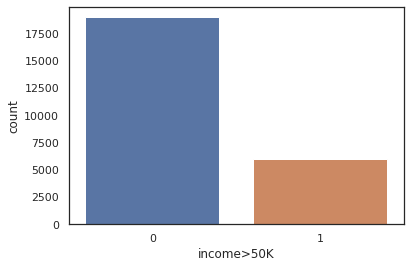

In [10]:
# Count of >50K & <=50K
sns.countplot(dataset['income>50K'],label="Count")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


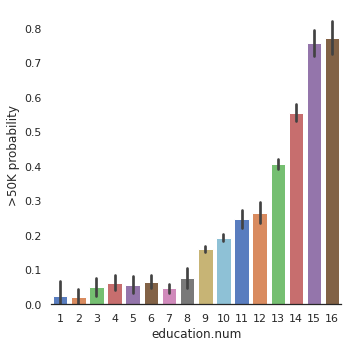

In [11]:
# Explore Education Num vs Income
g = sns.factorplot(x="education.num",y="income>50K",data=dataset,kind="bar",size = 5,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


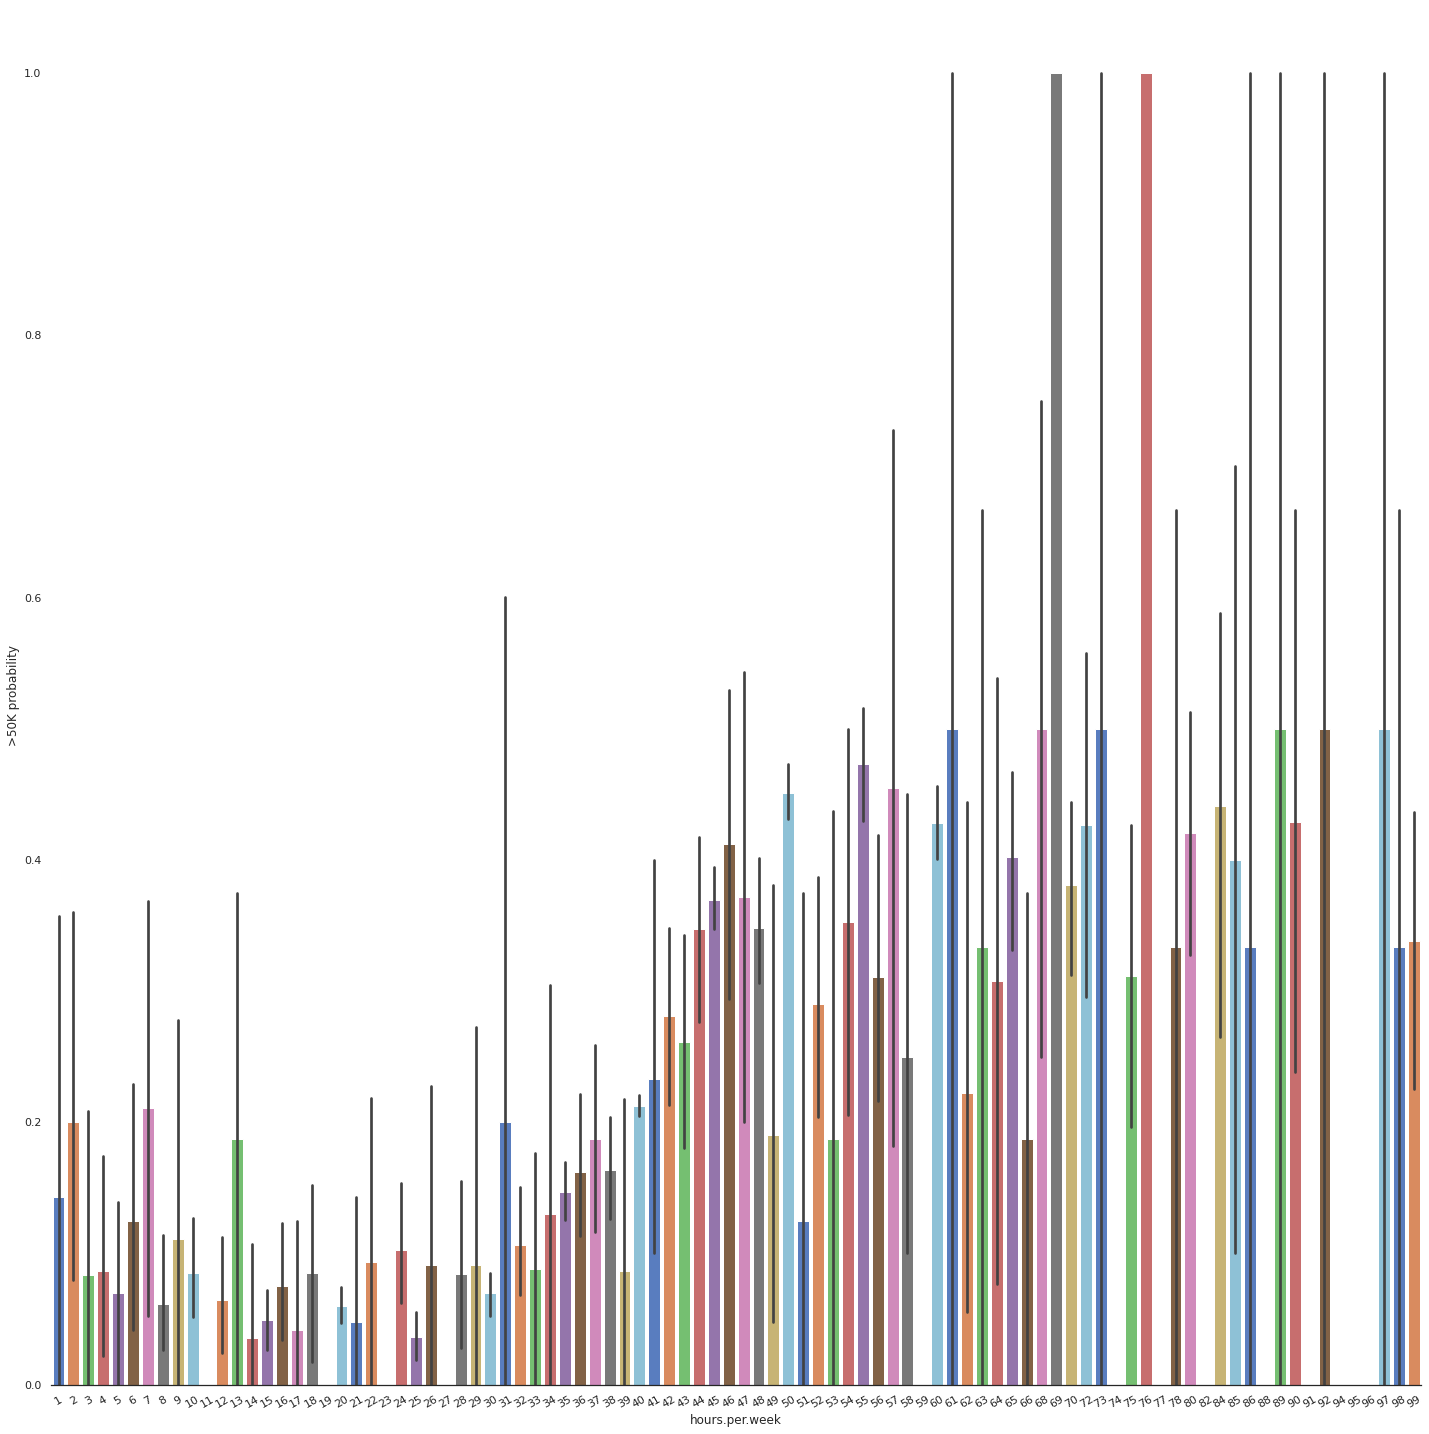

In [150]:
# Explore Hours Per Week vs Income
g  = sns.factorplot(x="hours.per.week",y="income>50K",data=dataset,kind="bar",size = 20,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")
g.set_xticklabels(rotation=30)

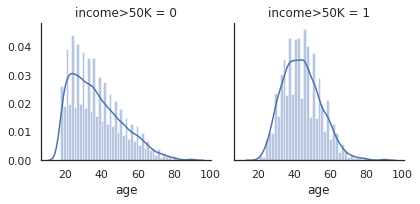

In [143]:
# Explore Age vs Income
g = sns.FacetGrid(dataset, col='income>50K')
g = g.map(sns.distplot, "age")
plt.show()

###2.2. Categorical Data

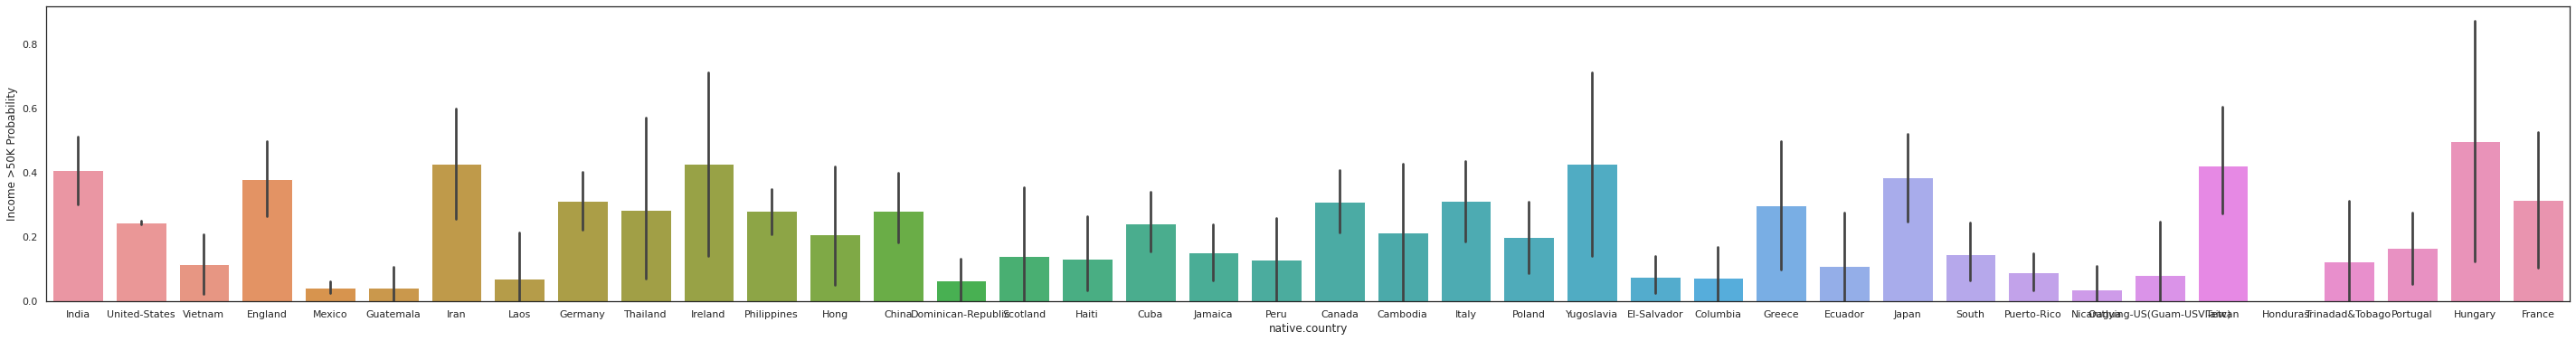

In [144]:
# Explore Native Nation vs Income
plt.figure(figsize=(50, 6))
g = sns.barplot(x="native.country",y="income>50K",data=dataset)
g = g.set_ylabel("Income >50K Probability")
plt.show()

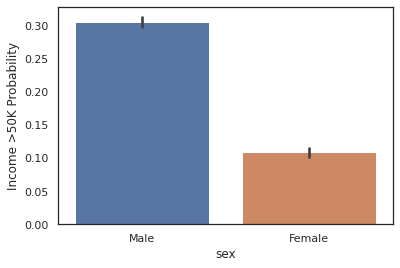

In [145]:
# Explore Sex vs Income
g = sns.barplot(x="sex",y="income>50K",data=dataset)
g = g.set_ylabel("Income >50K Probability")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


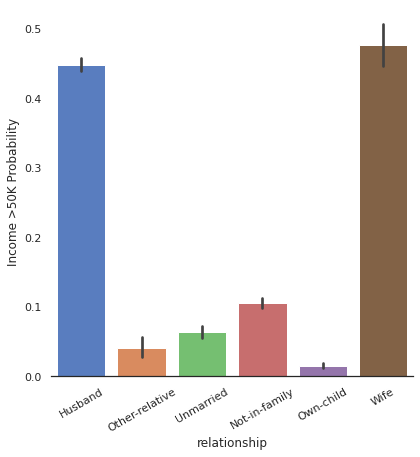

In [147]:
# Explore Relationship vs Income
g = sns.factorplot(x="relationship",y="income>50K",data=dataset,kind="bar", size = 6 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
g.set_xticklabels(rotation=30)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


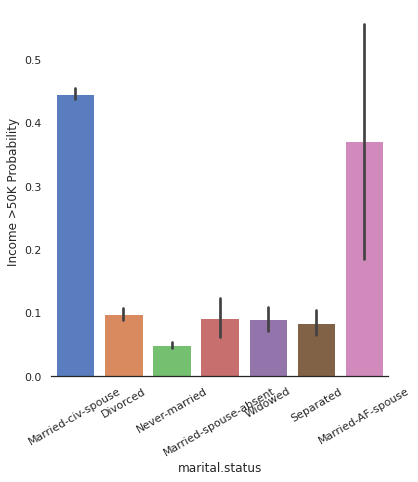

In [151]:
# Explore Marital Status vs Income
g = sns.factorplot(x="marital.status",y="income>50K",data=dataset,kind="bar", size = 6 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
g.set_xticklabels(rotation=30)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


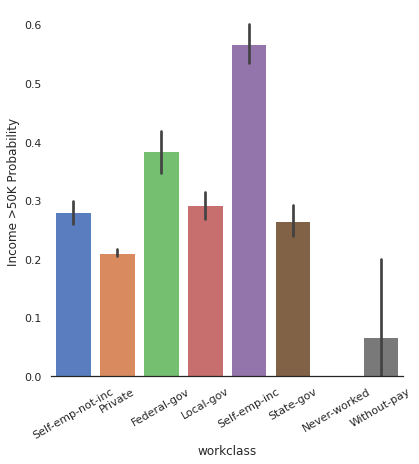

In [152]:
# Explore Workclass vs Income
g = sns.factorplot(x="workclass",y="income>50K",data=dataset,kind="bar", size = 6 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
g.set_xticklabels(rotation=30)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


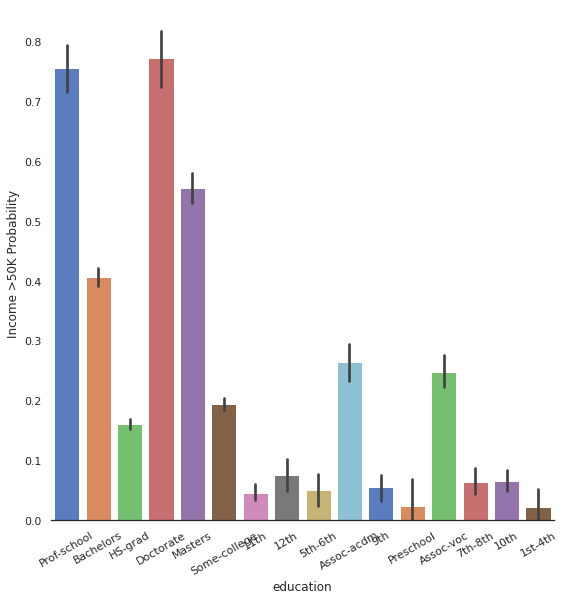

In [158]:
# Explore Workclass vs Income
g = sns.factorplot(x="education",y="income>50K",data=dataset,kind="bar", size = 8,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
g.set_xticklabels(rotation=30)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


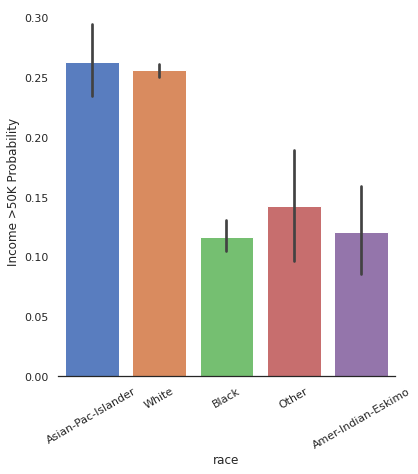

In [155]:
# Explore Workclass vs Income
g = sns.factorplot(x="race",y="income>50K",data=dataset,kind="bar", size = 6 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
g.set_xticklabels(rotation=30)
plt.show()

##3. Feature Engineering

In [0]:
# Create Married Column - Binary Yes(1) or No(0)
dataset["marital.status"] = dataset["marital.status"].replace(['Never-married','Divorced','Separated','Widowed'], 'Single')
dataset["marital.status"] = dataset["marital.status"].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], 'Married')
dataset["marital.status"] = dataset["marital.status"].map({"Married":1, "Single":0})
dataset["marital.status"] = dataset["marital.status"].astype(int)

In [0]:
# dataset["education"] = dataset["education"].replace(['Prof-school','Bachelors','Doctorate', 'Masters','Some-college', 'Assoc-acdm', 'Assoc-voc'], 'College')
# dataset["education"] = dataset["education"].replace(['Preschool', '1st-4th','5th-6th','7th-8th','9th','10th','11th','12th','HS-grad'], 'NoCollege')
# dataset["education"] = dataset["education"].map({"College":1, "NoCollege":0})
# dataset["education"] = dataset["education"].astype(int)

In [59]:
dataset.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status     int64
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income>50K         int64
dtype: object

Convert Categorical to Numerical

In [0]:
def cat_to_num(data):
  int_columns = data.select_dtypes(['int64']).columns
  data[int_columns] = data[int_columns].astype('float32') # convert integer to float

  cat_columns = data.select_dtypes(['object']).columns
  data[cat_columns] = data[cat_columns].astype('category') #covert categorical to numerical
  data[cat_columns] = data[cat_columns].apply(lambda x: x.cat.codes)
  return data


dataset = cat_to_num(dataset)  

In [61]:
dataset.dtypes

age               float32
workclass            int8
fnlwgt            float32
education            int8
education.num     float32
marital.status    float32
occupation           int8
relationship         int8
race                 int8
sex                  int8
capital.gain      float32
capital.loss      float32
hours.per.week    float32
native.country       int8
income>50K        float32
dtype: object

Correlation Matrix

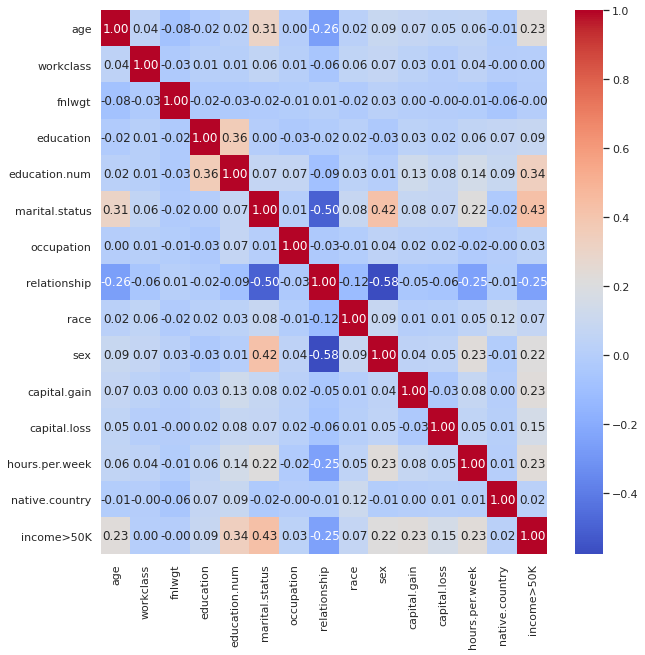

In [62]:
# Correlation matrix between numerical values
plt.figure(figsize=(10, 10))
g = sns.heatmap(dataset.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
plt.show()

Dropping features that are highly correlated with the other feature

In [0]:
# Drop the data you don't want to use
dataset.drop(labels=["workclass","education","occupation","relationship","race","native.country"], axis = 1, inplace = True)

In [64]:
dataset.dtypes

age               float32
fnlwgt            float32
education.num     float32
marital.status    float32
sex                  int8
capital.gain      float32
capital.loss      float32
hours.per.week    float32
income>50K        float32
dtype: object

In [0]:
# # Split-out Validation Dataset and Create Test Variables
# array = dataset.values
# X = array[:,0:8]
# Y = array[:,8]
# print('Split Data: X')
# print(X)
# print('Split Data: Y')
# print(Y)
X = dataset.drop('income>50K',axis=1)
Y = dataset['income>50K']

In [66]:
X.head()

,age,fnlwgt,education.num,marital.status,sex,capital.gain,capital.loss,hours.per.week
0,53.0,93449.0,15.0,1.0,1,0.0,0.0,40.0
1,33.0,123424.0,13.0,1.0,1,0.0,0.0,40.0
2,47.0,144844.0,9.0,1.0,1,0.0,0.0,40.0
3,40.0,114580.0,9.0,0.0,0,0.0,0.0,40.0
4,39.0,115618.0,9.0,1.0,1,0.0,0.0,50.0


In [0]:
# normalize data (this is important for model convergence)
def nor(X_):
  dtypes = list(zip(X_.dtypes.index, map(str, X_.dtypes)))
  for k,dtype in dtypes:
      if dtype == "float32":
          X_[k] -= X_[k].mean()
          X_[k] /= X_[k].std()
  return X_        

X= nor(X)

In [68]:
X.head()

,age,fnlwgt,education.num,marital.status,sex,capital.gain,capital.loss,hours.per.week
0,1.042794,-0.901068,1.911693,1.057978,1,-0.147002,-0.217497,-0.042501
1,-0.414995,-0.617782,1.135478,1.057978,1,-0.147002,-0.217497,-0.042501
2,0.605458,-0.415347,-0.416951,1.057978,1,-0.147002,-0.217497,-0.042501
3,0.095231,-0.701365,-0.416951,-0.945161,0,-0.147002,-0.217497,-0.042501
4,0.022342,-0.691555,-0.416951,1.057978,1,-0.147002,-0.217497,0.763061


##4. Learning Models

In [69]:
validation_size = 0.20
seed = 7
num_folds = 10
scoring = 'accuracy'
X_train, X_validation, Y_train, Y_validation = train_test_split(X,Y,
    test_size=validation_size,random_state=seed)

# Params for Random Forest
num_trees = 100
max_features = 3

#Spot Check 5 Algorithms (CART, AdaBoost,RF, SVM)
models = []
models.append(('CART', DecisionTreeClassifier()))
models.append(('Adaboost', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('Bagging', BaggingClassifier(n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
#models.append(('SVM', SVC()))
# evalutate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


CART: 0.810400 (0.008024)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Adaboost: 0.856050 (0.006908)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Bagging: 0.843900 (0.008868)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RF: 0.845150 (0.007665)


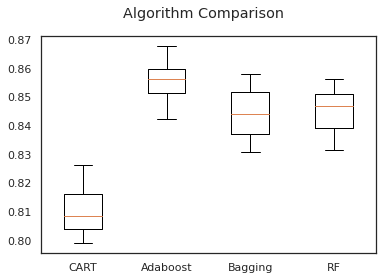

In [70]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LR: 0.839200 (0.007517)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVM-Linear: 0.841050 (0.007481)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVM-Kernel: 0.846200 (0.006474)


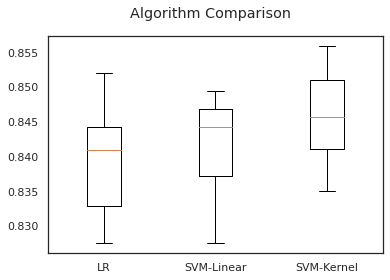

In [81]:
#Penalizing models
p_models = []
p_models.append(('LR', LogisticRegression()))
p_models.append(('SVM-Linear', SVC(kernel='linear')))
p_models.append(('SVM-Kernel', SVC(kernel='rbf')))
# evalutate each model in turn
p_results = []
p_names = []
for name, model in p_models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    p_results.append(cv_results)
    p_names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(p_results)
ax.set_xticklabels(p_names)
plt.show()    

In [0]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear', 'rbf'), 'C':[0.1, 10,100], 'gamma': [0.1, 10, 100]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, Y_train)

##5. Tuning Models

Random forest Tuning

In [73]:
#best n_estimator = 250
#best max_feature = 5
# Tune Random Forest
n_estimators = np.array([50,100,150,200,250])
max_features = np.array([1,2,3,4,5])
param_grid = dict(n_estimators=n_estimators,max_features=max_features)
model = RandomForestClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Best: 0.846650 using {'max_features': 1, 'n_estimators': 250}
0.844650 (0.007273) with: {'max_features': 1, 'n_estimators': 50}
0.845250 (0.006574) with: {'max_features': 1, 'n_estimators': 100}
0.844200 (0.007312) with: {'max_features': 1, 'n_estimators': 150}
0.844400 (0.006763) with: {'max_features': 1, 'n_estimators': 200}
0.846650 (0.005732) with: {'max_features': 1, 'n_estimators': 250}
0.844100 (0.008052) with: {'max_features': 2, 'n_estimators': 50}
0.845650 (0.008585) with: {'max_features': 2, 'n_estimators': 100}
0.844600 (0.007572) with: {'max_features': 2, 'n_estimators': 150}
0.845150 (0.007284) with: {'max_features': 2, 'n_estimators': 200}
0.844750 (0.007504) with: {'max_features': 2, 'n_estimators': 250}
0.844250 (0.009261) with: {'max_features': 3, 'n_estimators': 50}
0.844250 (0.007414) with: {'max_features': 3, 'n_estimators': 100}
0.844950 (0.007485) with: {'max_features': 3, 'n_estimators': 150}
0.845550 (0.007792) with: {'max_features': 3, 'n_estimators': 200}
0.8

AdaBoost Tuning

In [77]:
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [50,100,150,200,250]
             }
DTC = DecisionTreeClassifier(random_state = 11, max_features = "auto", class_weight = "balanced",max_depth = None)

ABC = AdaBoostClassifier(base_estimator = DTC)

grid_search_ABC = GridSearchCV(ABC, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid_search_ABC.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.830300 using {'base_estimator__criterion': 'gini', 'base_estimator__splitter': 'best', 'n_estimators': 200}
0.826800 (0.007139) with: {'base_estimator__criterion': 'gini', 'base_estimator__splitter': 'best', 'n_estimators': 50}
0.829550 (0.009546) with: {'base_estimator__criterion': 'gini', 'base_estimator__splitter': 'best', 'n_estimators': 100}
0.827150 (0.006403) with: {'base_estimator__criterion': 'gini', 'base_estimator__splitter': 'best', 'n_estimators': 150}
0.830300 (0.007086) with: {'base_estimator__criterion': 'gini', 'base_estimator__splitter': 'best', 'n_estimators': 200}
0.828250 (0.007941) with: {'base_estimator__criterion': 'gini', 'base_estimator__splitter': 'best', 'n_estimators': 250}
0.811750 (0.007571) with: {'base_estimator__criterion': 'gini', 'base_estimator__splitter': 'random', 'n_estimators': 50}
0.817800 (0.008158) with: {'base_estimator__criterion': 'gini', 'base_estimator__splitter': 'random', 'n_estimators': 100}
0.822750 (0.010600) with: {'base_es

 SVM Tunning

In [86]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
parameters = {'C':[0.1, 10], 'gamma': [0.1, 0.01]}
svc = svm.SVC(kernel='rbf')
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, Y_train)
clf.best_params_

{'C': 10, 'gamma': 0.1}

In [87]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
params = clf.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.844150 (0.004011) with: {'C': 0.1, 'gamma': 0.1}
0.837700 (0.004042) with: {'C': 0.1, 'gamma': 0.01}
0.846350 (0.003459) with: {'C': 10, 'gamma': 0.1}
0.843950 (0.003799) with: {'C': 10, 'gamma': 0.01}


##Best Model

In [88]:
random_forest = RandomForestClassifier(n_estimators=250,max_features=5)
random_forest.fit(X_train, Y_train)
predictions = random_forest.predict(X_validation)
print("Accuracy: %s%%" % (100*accuracy_score(Y_validation, predictions)))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

Accuracy: 85.11999999999999%
[[3522  295]
 [ 449  734]]
              precision    recall  f1-score   support

         0.0       0.89      0.92      0.90      3817
         1.0       0.71      0.62      0.66      1183

    accuracy                           0.85      5000
   macro avg       0.80      0.77      0.78      5000
weighted avg       0.85      0.85      0.85      5000

